In [18]:
# Dependencies and Setup
import pandas as pd
import csv
import os


# File to Load (change path, if needed)
season_data = "Resources/Seasons_stats.csv"
players = "Resources/Players.csv"
player_data = "Resources/player_data.csv"


In [19]:
# Read School and Student Data File and store into Pandas Data Frames
season_data_df = pd.read_csv(season_data, low_memory=False)
del season_data_df['Unnamed: 0']
season_data_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [20]:
season_data_df = season_data_df.sort_values(['Year'], ascending=False)
season_data_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


In [21]:
# season_data_df.isna().sum()

In [22]:
#season_data_df.fillna(0)

In [23]:
players_df = pd.read_csv(players, low_memory=False)
del players_df['Unnamed: 0']
players_df

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [24]:
player_data_df = pd.read_csv(player_data, low_memory=False)
player_data_df

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [25]:
player_data_df = player_data_df.rename(columns={"name":"Player", "position":"Career position"})
player_data_df

,Player,year_start,year_end,Career position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [26]:
season_data_1982_df = season_data_df.loc[(season_data_df['Year'] >= 1982)]
season_data_1982_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,1982.0,Mike Newlin,SG,33.0,NYK,76.0,32.0,1507.0,11.5,0.519,...,0.857,36.0,55.0,91.0,170.0,33.0,3.0,104.0,194.0,705.0
6703,1982.0,Kurt Nimphius,C,23.0,DAL,63.0,27.0,1085.0,12.0,0.489,...,0.583,92.0,203.0,295.0,61.0,17.0,82.0,56.0,190.0,337.0
6699,1982.0,Swen Nater,C,32.0,SDC,21.0,7.0,575.0,16.4,0.625,...,0.747,46.0,146.0,192.0,30.0,6.0,9.0,48.0,64.0,262.0
6698,1982.0,Larry Nance,PF,22.0,PHO,80.0,0.0,1186.0,14.7,0.543,...,0.641,95.0,161.0,256.0,82.0,42.0,71.0,104.0,169.0,529.0


In [213]:
# Empty Data Frame
teams_years = pd.DataFrame()
teams_years ["Year"] = ""
teams_years ["Team Name"] = ""
teams_years ["Team Abbreviation"] = ""
teams_years ["Rank"] = ""
teams_years

,Year,Team Name,Team Abbreviation,Rank


In [214]:
from sportsreference.nba.teams import Teams

ycount = 0
for Year in range(1982, 2018): 
    names = []
    abbrs = []
    ranks = []

    teams = Teams(year=Year)
    for team in teams:
        name = team.name
        abbr = team.abbreviation
        rank = team.rank
    
        names.append (name)
        abbrs.append(abbr)
        ranks.append(rank)
    
    for i in range(ycount, (len(names)+ycount)):
        teams_years.loc[i, "Year"] = Year
        teams_years.loc[i, "Team Name"] = names[i-ycount]
        teams_years.loc[i, "Team Abbreviation"] = abbrs[i-ycount]
        teams_years.loc[i, "Rank"] = ranks[i-ycount]
    
    ycount =ycount + len(names)

teams_years


,Year,Team Name,Team Abbreviation,Rank
0,1982,Denver Nuggets,DEN,1
1,1982,Los Angeles Lakers,LAL,2
2,1982,San Antonio Spurs,SAS,3
3,1982,Boston Celtics,BOS,4
4,1982,Philadelphia 76ers,PHI,5
...,...,...,...,...
994,2017,Detroit Pistons,DET,26
995,2017,Orlando Magic,ORL,27
996,2017,Utah Jazz,UTA,28
997,2017,Memphis Grizzlies,MEM,29


In [215]:
teams_years.to_csv("resources/teams_years_rank_1982_2017.csv")

In [27]:
teams_years_df = pd.read_csv("resources/teams_years_rank_1982_2017.csv", low_memory=False)
teams_years_df.head()

,Unnamed: 0,Year,Team Name,Team Abbreviation,Rank
0,0,1982,Denver Nuggets,DEN,1
1,1,1982,Los Angeles Lakers,LAL,2
2,2,1982,San Antonio Spurs,SAS,3
3,3,1982,Boston Celtics,BOS,4
4,4,1982,Philadelphia 76ers,PHI,5


In [28]:
teams_years_df = teams_years_df.sort_values(['Year'], ascending=False)
del teams_years_df['Unnamed: 0']
teams_years_df = teams_years_df.reset_index(drop=True)
teams_years_df = teams_years_df.rename(columns={"Rank":"Team Rank"})
teams_years_df.head()

,Year,Team Name,Team Abbreviation,Team Rank
0,2017,Dallas Mavericks,DAL,30
1,2017,Indiana Pacers,IND,15
2,2017,Golden State Warriors,GSW,1
3,2017,Houston Rockets,HOU,2
4,2017,Denver Nuggets,DEN,3


In [11]:
colum_abbr = pd.read_csv("Resources/Abbr_kaggle.csv")
colum_abbr.head()

,Abbr,Full Name
0,G,Games
1,GS,Games Started
2,MP,Minutes Played
3,PER,Player Efficiency Rating
4,TS%,True Shooting %


In [248]:
abbrs = colum_abbr["Abbr"].tolist()
full_names = colum_abbr["Full Name"].tolist()
#print(f"{name}" for name in full_names)
#full_names

In [250]:
#abbrs

In [30]:
season_data_1982_df
season_data_1982_df = season_data_1982_df.reset_index(drop=True)
season_data_1982_df = season_data_1982_df.rename(columns={
#    colum_abbr['Abbr'] : colum_abbr['Full Name']
#    abbrs : full_names
    'Tm':'Team Abbreviation',
    'G':'Games',
    'GS':'Games Started',
    'MP': 'Minutes Played',
    'PER':'Player Efficiency Rating',
    'TS%':'True Shooting %',
    '3PAr':'3-Point Attempt Rate',
    'FTr':'Free Throw Rate',
    'ORB%':'Offensive Rebound Percentage',
    'DRB%':'Defensive Rebound Percentage',
    'TRB%':'Total Rebound Percentage',
    'AST%':'Assist Percentage',
    'STL%':'Steal Percentage',
    'BLK%':'Block Percentage',
    'TOV%':'Turnover Percentage',
    'USG%':'Usage Percentage',
    'blanl':'empty',
    'OWS':'Offensive Win Shares',
    'DWS':'Defensive Win Shares',
    'WS':'Win Shares',
    'WS/48':'Win Shares Per 48 Minutes',
    'blank2':'empty',
    'OBPM':'Offensive Box Plus/Minus',
    'DBPM':'Defensive Box Plus/Minus',
    'BPM':'Box Plus/Minus',
    'VORP':'Value Over Replacement',
    'FG':'Field Goals',
    'FGA':'Field Goal Attempts',
    'FG%':'Field Goal Percentage',
    '3P':'3-Point Field Goals',
    '3PA':'3-Point Field Goal Attempts',
    '3P%':'3-Point Field Goal Percentage',
    '2P':'2-Point Field Goals',
    '2PA':'2-Point Field Goal Attempts',
    '2P%':'2-Point Field Goal Percentage',
    'eFG%':'Effective Field Goal Percentage',
    'FT':'Free Throws',
    'FTA':'Free Throw Attempts',
    'FT%':'Free Throw Percentage',
    'ORB':'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB':'Total Rebounds',
    'AST':'Assists',
    'STL':'Steals',
    'BLK':'Blocks',
    'TOV': 'Turnovers',
    'PF':'Personal Fouls',
    'PTS':'Points'    
    })
season_data_1982_df.head(20)

,Year,Player,Pos,Age,Team Abbreviation,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
1,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
2,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
3,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
4,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0
5,2017.0,Jerami Grant,SF,22.0,PHI,2.0,0.0,41.0,3.3,0.390,...,0.500,0.0,7.0,7.0,0.0,0.0,4.0,3.0,5.0,16.0
6,2017.0,Jerami Grant,SF,22.0,TOT,80.0,4.0,1531.0,10.1,0.556,...,0.612,38.0,168.0,206.0,46.0,33.0,79.0,44.0,149.0,437.0
7,2017.0,Treveon Graham,SG,23.0,CHO,27.0,1.0,189.0,10.6,0.612,...,0.667,5.0,17.0,22.0,6.0,6.0,1.0,3.0,18.0,57.0
8,2017.0,Marcin Gortat,C,32.0,WAS,82.0,82.0,2556.0,15.5,0.593,...,0.648,238.0,611.0,849.0,121.0,40.0,65.0,118.0,213.0,883.0
9,2017.0,Eric Gordon,SG,28.0,HOU,75.0,15.0,2323.0,13.1,0.557,...,0.840,29.0,172.0,201.0,188.0,48.0,40.0,121.0,150.0,1217.0


In [31]:
del season_data_1982_df['empty']
season_data_1982_df.head()

,Year,Player,Pos,Age,Team Abbreviation,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
1,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
2,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
3,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
4,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


In [32]:
# season_data_1982_df = season_data_df.loc[(season_data_df['Year'] >= 1982)]
# season_data_1982_df

In [33]:
season_team_df = pd.merge(season_data_1982_df, teams_years_df, how="left", on=["Year", "Team Abbreviation"])
season_team_df.head()


,Year,Player,Pos,Age,Team Abbreviation,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank
0,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0,Los Angeles Lakers,17.0
1,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0,Boston Celtics,7.0
2,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0,San Antonio Spurs,14.0
3,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0,Chicago Bulls,23.0
4,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0,Oklahoma City Thunder,11.0


In [34]:
season_team_df.to_csv("output/season_team_1982_2017.csv")


In [35]:
players_season_df = pd.merge( player_data_df, season_team_df, how="left", on=["Player"])
players_season_df['Years Played'] = players_season_df['year_end'] - players_season_df['year_start']
del players_season_df['year_start']
del players_season_df['year_end']
players_season_df.head(20)

,Player,Career position,height,weight,birth_date,college,Year,Pos,Age,Team Abbreviation,...,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank,Years Played
0,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1995.0,PF,26.0,TOT,...,114.0,13.0,15.0,12.0,45.0,104.0,256.0,NaN,NaN,4
1,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1995.0,PF,26.0,SAC,...,106.0,13.0,15.0,12.0,40.0,102.0,254.0,Sacramento Kings,19.0,4
2,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1995.0,PF,26.0,PHI,...,8.0,0.0,0.0,0.0,5.0,2.0,2.0,Philadelphia 76ers,25.0,4
3,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1994.0,PF,25.0,BOS,...,46.0,3.0,2.0,3.0,17.0,20.0,64.0,Boston Celtics,16.0,4
4,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,TOT,...,337.0,27.0,25.0,26.0,97.0,189.0,578.0,NaN,NaN,4
5,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,MIL,...,37.0,10.0,6.0,4.0,13.0,24.0,64.0,Milwaukee Bucks,22.0,4
6,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,BOS,...,300.0,17.0,19.0,22.0,84.0,165.0,514.0,Boston Celtics,19.0,4
7,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1992.0,PF,23.0,POR,...,260.0,30.0,25.0,16.0,66.0,132.0,432.0,Portland Trail Blazers,4.0,4
8,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1991.0,PF,22.0,POR,...,89.0,12.0,4.0,12.0,22.0,39.0,135.0,Portland Trail Blazers,3.0,4
9,Zaid Abdul-Aziz,C-F,6-9,235.0,"April 7, 1946",Iowa State University,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [36]:
players_season_df['Career position'].value_counts()

G      6820
F      5066
C      2227
F-C    2116
G-F    1616
F-G    1046
C-F     937
Name: Career position, dtype: int64

In [98]:
GPos_player = players_season_df.loc[(players_season_df['Career position'] == 'G')|
                                        (players_season_df['Career position'] == 'G-F')]
GPos_player

,Player,Career position,height,weight,birth_date,college,Year,Pos,Age,Team Abbreviation,...,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank,Years Played
11,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University,2001.0,PG,31.0,VAN,...,25.0,76.0,9.0,1.0,26.0,50.0,266.0,Vancouver Grizzlies,25.0,10
12,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University,1998.0,PG,28.0,SAC,...,37.0,58.0,16.0,1.0,19.0,31.0,227.0,Sacramento Kings,22.0,10
13,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University,1997.0,PG,27.0,SAC,...,122.0,189.0,56.0,6.0,119.0,174.0,1031.0,Sacramento Kings,16.0,10
14,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University,1996.0,PG,26.0,DEN,...,138.0,389.0,64.0,3.0,115.0,117.0,1095.0,Denver Nuggets,20.0,10
15,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University,1995.0,PG,25.0,DEN,...,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,Denver Nuggets,13.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,Gary Zeller,G,6-3,205.0,"November 20, 1947",Drake University,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19821,Derrick Zimmerman,G,6-3,195.0,"December 2, 1981",Mississippi State University,2006.0,PG,24.0,NJN,...,4.0,7.0,0.0,0.0,4.0,4.0,4.0,New Jersey Nets,24.0,0
19823,Paul Zipser,G-F,6-8,215.0,"February 18, 1994",NaN,2017.0,SF,22.0,CHI,...,125.0,36.0,15.0,16.0,40.0,78.0,240.0,Chicago Bulls,23.0,1
19826,Bill Zopf,G,6-1,170.0,"June 7, 1948",Duquesne University,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [99]:
GPos_player_mean = GPos_player.groupby(['Player']).mean()
#Gpos_player_mean = Gpos_player_mean.reset_index(drop=True)
GPos_player_mean.fillna(0)

,weight,Year,Age,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,3-Point Attempt Rate,Free Throw Rate,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Rank,Years Played
Player,,,,,,,,,,,,,,,,,,,,,
A.J. English,175.0,1991.500000,23.500000,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047000,0.241000,...,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000,20.500000,1.0
A.J. Guyton,180.0,2002.000000,23.000000,26.666667,4.666667,415.333333,4.366667,0.324000,0.371000,0.068333,...,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333,19.666667,2.0
A.J. Price,181.0,2013.333333,26.333333,31.888889,2.777778,472.555556,10.388889,0.435000,0.456000,0.156889,...,37.222222,45.444444,68.111111,14.666667,1.000000,27.000000,28.000000,184.000000,14.500000,5.0
A.J. Wynder,180.0,1991.000000,26.000000,6.000000,0.000000,39.000000,7.600000,0.387000,0.083000,0.667000,...,2.000000,3.000000,8.000000,1.000000,0.000000,4.000000,1.000000,12.000000,6.000000,0.0
Aaron Brooks,161.0,2012.600000,27.600000,53.133333,15.066667,1139.200000,12.326667,0.512267,0.421733,0.180667,...,69.133333,90.666667,165.666667,31.266667,7.533333,84.800000,102.933333,522.600000,10.666667,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zabian Dowdell,191.0,2011.000000,26.000000,24.000000,0.000000,292.000000,11.700000,0.457000,0.080000,0.136000,...,15.000000,20.000000,51.000000,20.000000,2.000000,29.000000,30.000000,121.000000,4.000000,0.0
Zach LaVine,189.0,2016.000000,20.000000,68.666667,40.000000,1981.666667,13.400000,0.546333,0.338000,0.223333,...,176.333333,200.333333,222.000000,54.666667,12.333333,144.333333,151.666667,939.000000,17.000000,2.0
Zeke Sinicola,165.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0


In [66]:
AllPos_player_mean = players_season_df.groupby(['Player']).mean()
AllPos_player_mean.fillna(0)

,weight,Year,Age,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,3-Point Attempt Rate,Free Throw Rate,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Rank,Years Played
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,220.0,1993.888889,29.888889,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049000,0.437111,...,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222,10.764706,15.0
A.J. Bramlett,227.0,2000.000000,23.000000,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000000,0.000000,...,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000,18.000000,0.0
A.J. English,175.0,1991.500000,23.500000,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047000,0.241000,...,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000,20.500000,1.0
A.J. Guyton,180.0,2002.000000,23.000000,26.666667,4.666667,415.333333,4.366667,0.324000,0.371000,0.068333,...,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333,19.666667,2.0
A.J. Hammons,260.0,2017.000000,24.000000,22.000000,0.000000,163.000000,8.400000,0.472000,0.238000,0.476000,...,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000,30.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zendon Hamilton,250.0,2004.125000,28.125000,18.250000,1.875000,201.125000,13.400000,0.493375,0.000000,1.132000,...,36.000000,59.375000,4.125000,5.375000,3.500000,14.250000,27.500000,76.375000,19.571429,5.0
Zhou Qi,210.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Zoran Dragic,200.0,2015.000000,25.000000,10.666667,0.666667,50.000000,8.433333,0.412667,0.500333,0.211000,...,2.000000,5.333333,3.333333,1.333333,0.000000,3.333333,4.000000,18.666667,19.000000,0.0


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sn

from scipy.stats import linregress


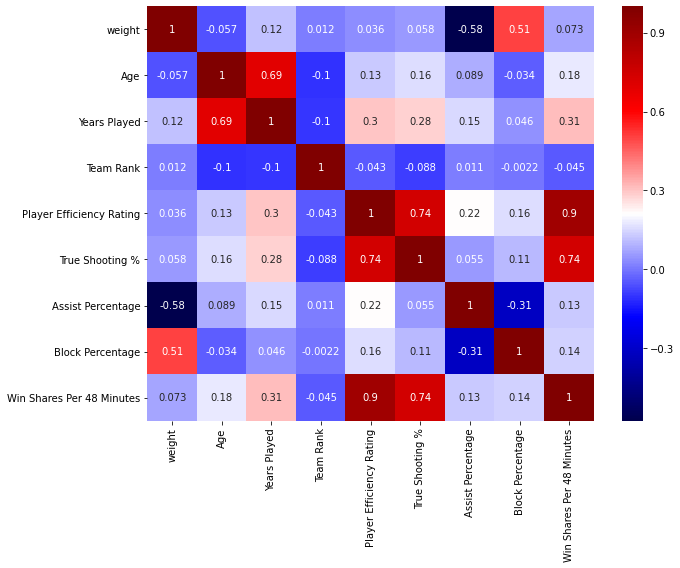

In [71]:
AllPos_set1 = pd.DataFrame(AllPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Player Efficiency Rating','True Shooting %', 'Assist Percentage', 
    'Block Percentage', 'Win Shares Per 48 Minutes',
    ])
corrMatrix = AllPos_set1.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
fig_name = "Allpos_set1"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
#cmap='cool'
plt.show()

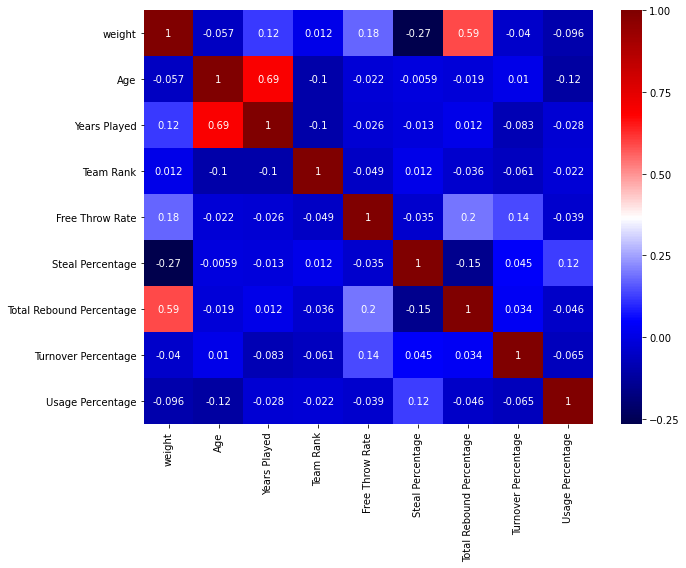

In [89]:
# Set2
# Free Throw Rate
# Total Rebound Percentage
# Steal Percentage
# Turnover Percentage
# Usage Percentage
AllPos_set2 = pd.DataFrame(AllPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Free Throw Rate','Steal Percentage', 'Total Rebound Percentage', 
    'Turnover Percentage', 'Usage Percentage',
    ])
corrMatrix = AllPos_set2.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "AllPos_set2"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

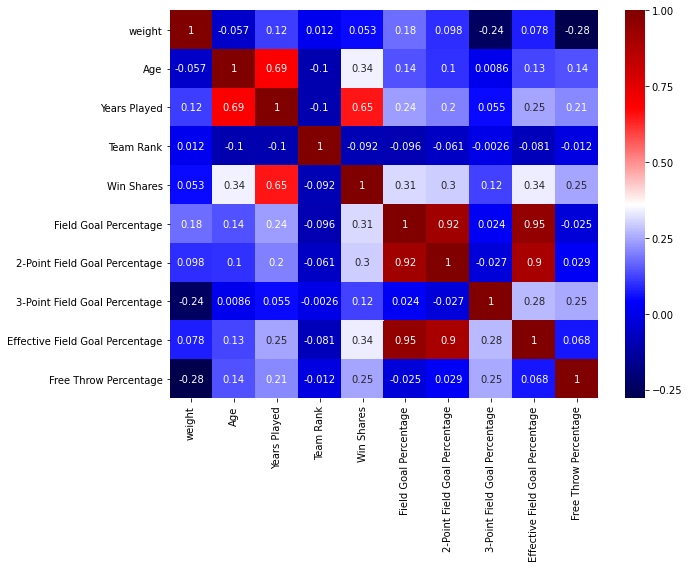

In [90]:
# Set3
# Win Shares
# Field Goal Percentage
# 2-Point Field Goal Percentage
# 3-Point Field Goal Percentage
# Effective Field Goal Percentage
# Free Throw Percentage

AllPos_set3 = pd.DataFrame(AllPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Win Shares','Field Goal Percentage', '2-Point Field Goal Percentage', 
    '3-Point Field Goal Percentage', 'Effective Field Goal Percentage',
    'Free Throw Percentage'
    ])
corrMatrix = AllPos_set3.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "AllPos_set3"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

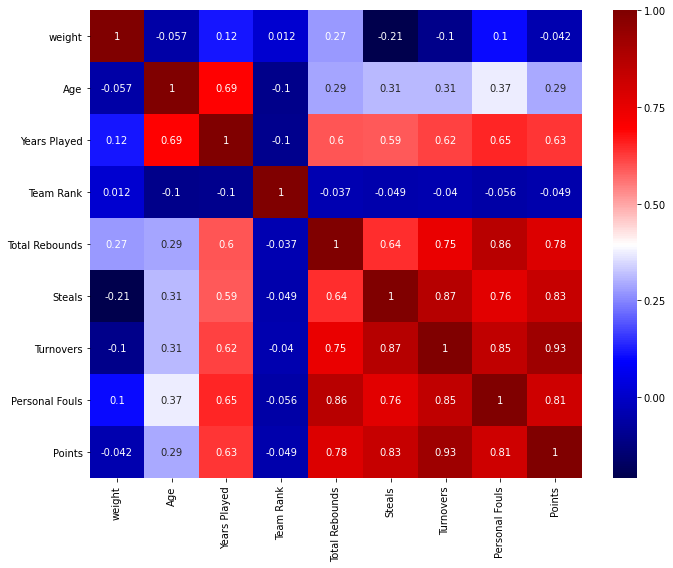

In [91]:
# Set4
# Total Rebounds
# Steals
# Turnovers
# Personal Fouls
# Points

AllPos_set4 = pd.DataFrame(AllPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Total Rebounds','Steals', 'Turnovers', 
    'Personal Fouls', 'Points'
    ])
corrMatrix = AllPos_set4.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "AllPos_set4"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

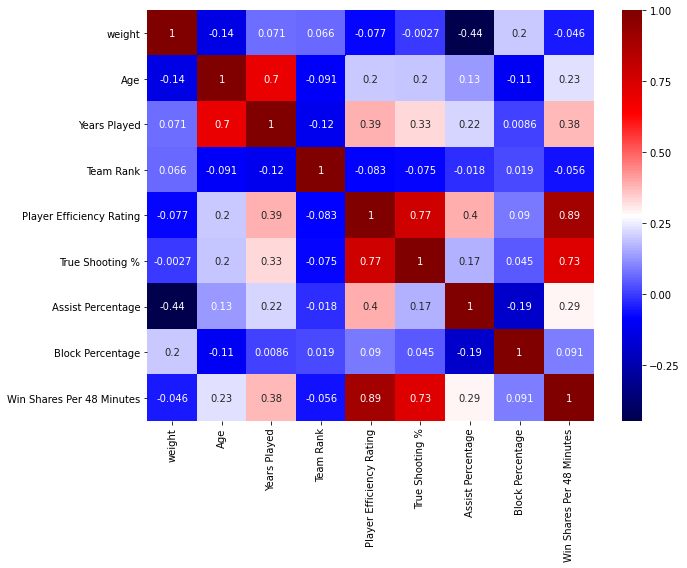

In [100]:
# Set1
# Player Efficiency Rating',
# True Shooting %', 
# 'Assist Percentage', 
# Block Percentage', 
# 'Win Shares Per 48 Minutes'

GPos_set1 = pd.DataFrame(GPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Player Efficiency Rating','True Shooting %', 'Assist Percentage', 
    'Block Percentage', 'Win Shares Per 48 Minutes',
    ])
corrMatrix = GPos_set1.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Gpos_set1"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

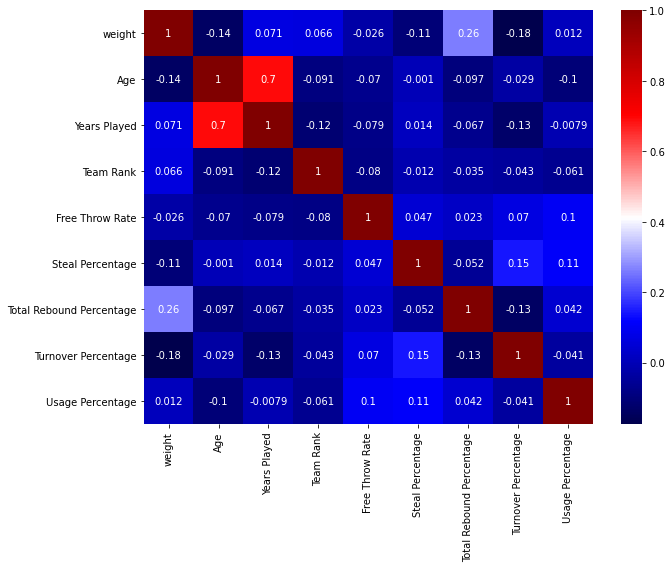

In [101]:
# Set2
# Free Throw Rate
# Total Rebound Percentage
# Steal Percentage
# Turnover Percentage
# Usage Percentage
GPos_set2 = pd.DataFrame(GPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Free Throw Rate','Steal Percentage', 'Total Rebound Percentage', 
    'Turnover Percentage', 'Usage Percentage',
    ])
corrMatrix = GPos_set2.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Gpos_set2"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()


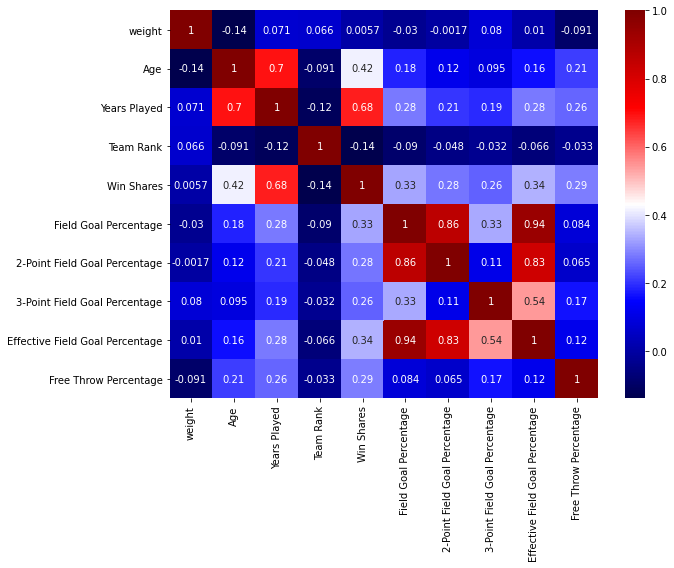

In [102]:
# Set3
# Win Shares
# Field Goal Percentage
# 2-Point Field Goal Percentage
# 3-Point Field Goal Percentage
# Effective Field Goal Percentage
# Free Throw Percentage

GPos_set3 = pd.DataFrame(GPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Win Shares','Field Goal Percentage', '2-Point Field Goal Percentage', 
    '3-Point Field Goal Percentage', 'Effective Field Goal Percentage',
    'Free Throw Percentage'
    ])
corrMatrix = GPos_set3.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Gpos_set3"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

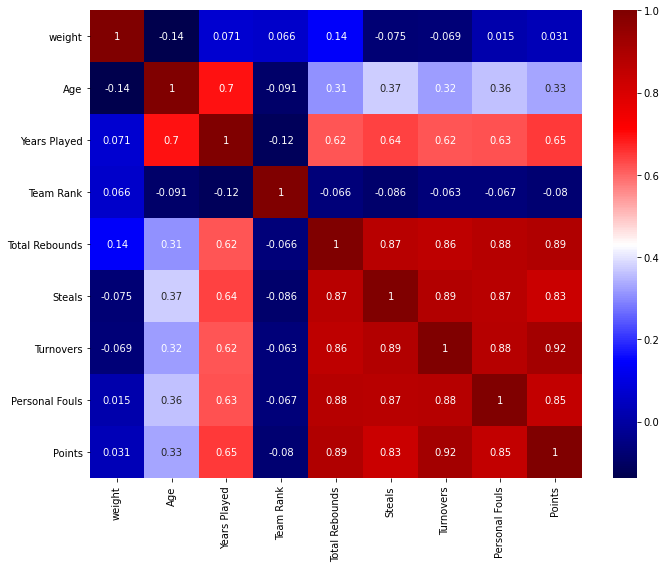

In [103]:
# Set4
# Total Rebounds
# Steals
# Turnovers
# Personal Fouls
# Points

GPos_set4 = pd.DataFrame(GPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Total Rebounds','Steals', 'Turnovers', 
    'Personal Fouls', 'Points'
    ])
corrMatrix = GPos_set4.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Gpos_set4"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

In [86]:
# players_season_df['height'] = players_season_df['height'].replace('-', "'", redex=True)
# print(players_season_df['height'])

In [104]:
CPos_player = players_season_df.loc[(players_season_df['Career position'] == 'C')|
                                        (players_season_df['Career position'] == 'C-F')]
CPos_player

,Player,Career position,height,weight,birth_date,college,Year,Pos,Age,Team Abbreviation,...,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank,Years Played
9,Zaid Abdul-Aziz,C-F,6-9,235.0,"April 7, 1946",Iowa State University,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
10,Kareem Abdul-Jabbar,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
71,Alvan Adams,C-F,6-9,210.0,"July 19, 1954",University of Oklahoma,1988.0,C,33.0,PHO,...,365.0,183.0,82.0,41.0,140.0,245.0,611.0,Phoenix Suns,10.0,12
72,Alvan Adams,C-F,6-9,210.0,"July 19, 1954",University of Oklahoma,1987.0,C,32.0,PHO,...,338.0,223.0,62.0,37.0,139.0,207.0,756.0,Phoenix Suns,9.0,12
73,Alvan Adams,C-F,6-9,210.0,"July 19, 1954",University of Oklahoma,1986.0,C,31.0,PHO,...,477.0,324.0,103.0,46.0,206.0,272.0,841.0,Phoenix Suns,12.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19819,George Zidek,C,7-0,250.0,"August 2, 1973","University of California, Los Angeles",1997.0,C,23.0,TOT,...,86.0,14.0,5.0,3.0,27.0,61.0,143.0,NaN,NaN,2
19820,George Zidek,C,7-0,250.0,"August 2, 1973","University of California, Los Angeles",1996.0,C,22.0,CHH,...,183.0,16.0,9.0,7.0,38.0,170.0,281.0,Charlotte Hornets,8.0,2
19822,Stephen Zimmerman,C,7-0,240.0,"September 9, 1996","University of Nevada, Las Vegas",2017.0,C,20.0,ORL,...,35.0,4.0,2.0,5.0,3.0,17.0,23.0,Orlando Magic,27.0,0
19825,Jim Zoet,C,7-1,240.0,"December 20, 1953",Kent State University,1983.0,C,29.0,DET,...,8.0,1.0,1.0,3.0,4.0,9.0,2.0,Detroit Pistons,6.0,0


In [105]:
CPos_player_mean = CPos_player.groupby(['Player']).mean()
#Gpos_player_mean = Gpos_player_mean.reset_index(drop=True)
CPos_player_mean.fillna(0)

,weight,Year,Age,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,3-Point Attempt Rate,Free Throw Rate,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Rank,Years Played
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Bramlett,227.0,2000.000000,23.000000,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000000,0.000000,...,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000,18.000000,0
A.J. Hammons,260.0,2017.000000,24.000000,22.000000,0.000000,163.000000,8.400000,0.472000,0.238000,0.476000,...,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000,30.000000,0
Aaron Gray,270.0,2011.363636,26.363636,35.181818,8.454545,410.636364,10.900000,0.525000,0.004000,0.389545,...,80.818182,127.909091,22.818182,10.272727,9.636364,28.545455,72.363636,112.272727,18.666667,6
Adonal Foyle,250.0,2004.285714,28.285714,53.071429,19.214286,937.285714,12.000000,0.505692,0.000692,0.313615,...,155.500000,249.071429,24.642857,18.857143,85.785714,42.857143,112.857143,214.714286,14.538462,11
Al Beard,200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,270.0,2010.500000,25.500000,68.642857,32.571429,1456.428571,14.042857,0.535286,0.005643,0.535500,...,253.928571,409.214286,88.071429,49.928571,24.571429,94.000000,176.071429,483.857143,17.428571,14
Zeljko Rebraca,257.0,2004.000000,31.000000,34.142857,3.428571,507.571429,12.728571,0.558143,0.000000,0.369286,...,75.285714,106.571429,13.428571,8.857143,24.428571,31.428571,80.571429,195.285714,19.833333,4
Zelmo Beaty,225.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12


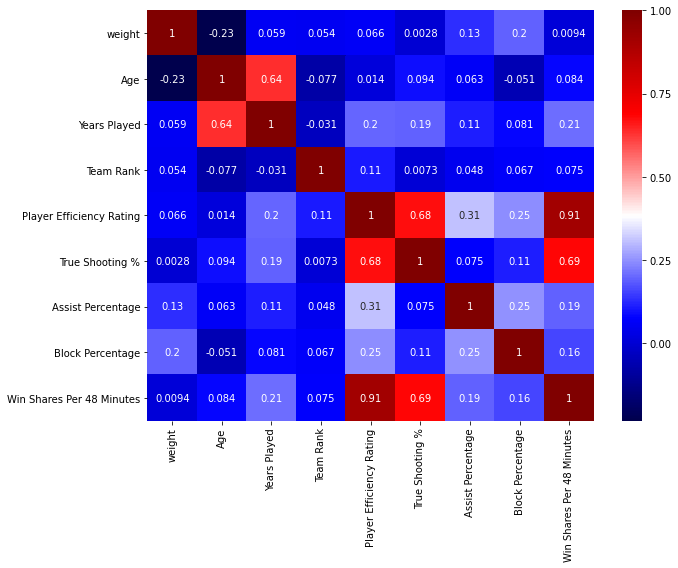

In [106]:
# Set1
# Player Efficiency Rating',
# True Shooting %', 
# 'Assist Percentage', 
# Block Percentage', 
# 'Win Shares Per 48 Minutes'

CPos_set1 = pd.DataFrame(CPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Player Efficiency Rating','True Shooting %', 'Assist Percentage', 
    'Block Percentage', 'Win Shares Per 48 Minutes',
    ])
corrMatrix = CPos_set1.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Cpos_set1"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

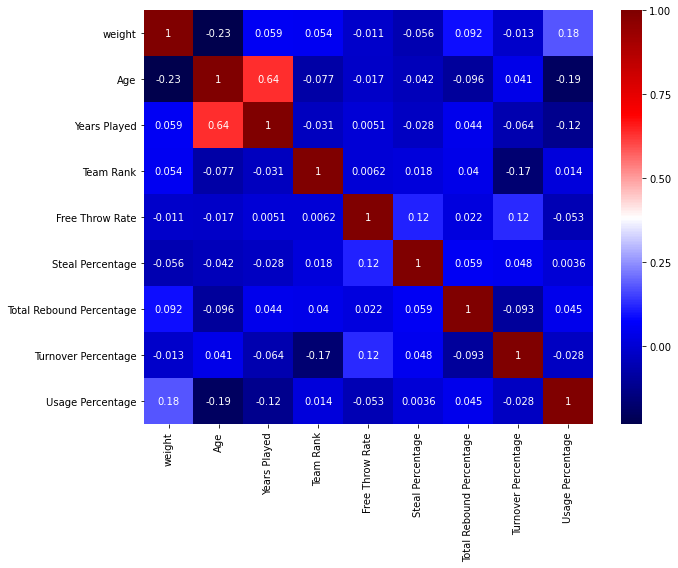

In [107]:
# Set2
# Free Throw Rate
# Total Rebound Percentage
# Steal Percentage
# Turnover Percentage
# Usage Percentage
CPos_set2 = pd.DataFrame(CPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Free Throw Rate','Steal Percentage', 'Total Rebound Percentage', 
    'Turnover Percentage', 'Usage Percentage',
    ])
corrMatrix = CPos_set2.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Cpos_set2"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

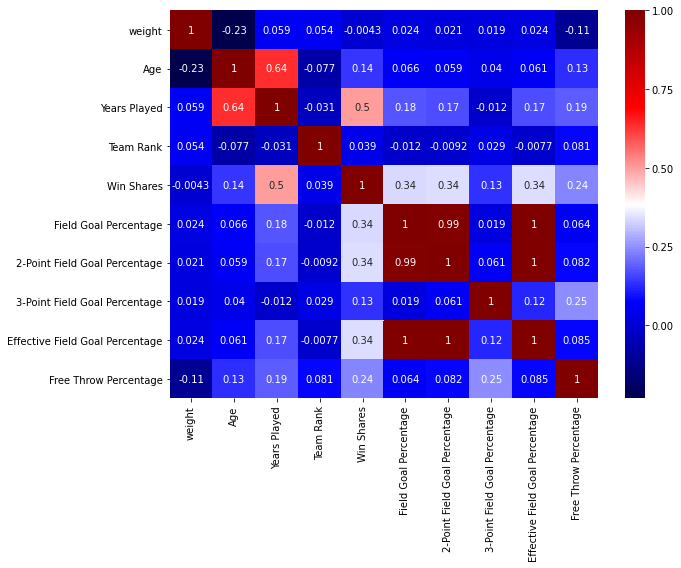

In [108]:
# Set3
# Win Shares
# Field Goal Percentage
# 2-Point Field Goal Percentage
# 3-Point Field Goal Percentage
# Effective Field Goal Percentage
# Free Throw Percentage

CPos_set3 = pd.DataFrame(CPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Win Shares','Field Goal Percentage', '2-Point Field Goal Percentage', 
    '3-Point Field Goal Percentage', 'Effective Field Goal Percentage',
    'Free Throw Percentage'
    ])
corrMatrix = CPos_set3.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Cpos_set3"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

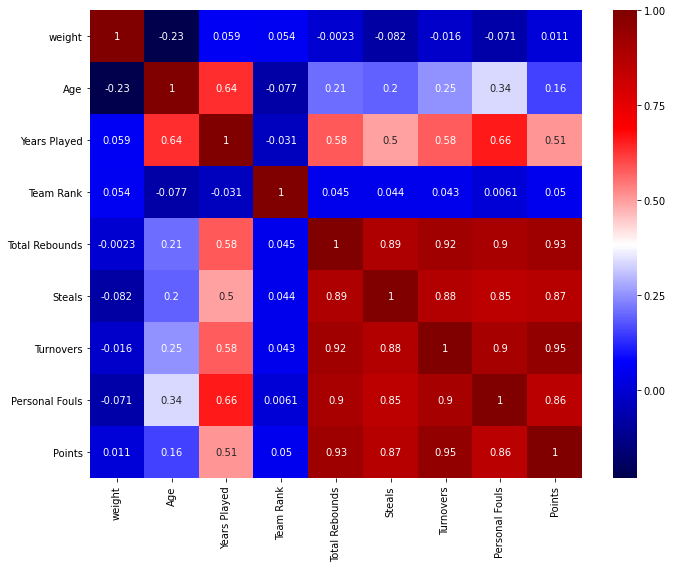

In [109]:
# Set4
# Total Rebounds
# Steals
# Turnovers
# Personal Fouls
# Points

CPos_set4 = pd.DataFrame(CPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Total Rebounds','Steals', 'Turnovers', 
    'Personal Fouls', 'Points'
    ])
corrMatrix = CPos_set4.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Cpos_set4"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

In [110]:
FPos_player = players_season_df.loc[(players_season_df['Career position'] == 'F')|
                                    (players_season_df['Career position'] == 'F-G')|
                                    (players_season_df['Career position'] == 'F-C')]
FPos_player

,Player,Career position,height,weight,birth_date,college,Year,Pos,Age,Team Abbreviation,...,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank,Years Played
0,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1995.0,PF,26.0,TOT,...,114.0,13.0,15.0,12.0,45.0,104.0,256.0,NaN,NaN,4
1,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1995.0,PF,26.0,SAC,...,106.0,13.0,15.0,12.0,40.0,102.0,254.0,Sacramento Kings,19.0,4
2,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1995.0,PF,26.0,PHI,...,8.0,0.0,0.0,0.0,5.0,2.0,2.0,Philadelphia 76ers,25.0,4
3,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1994.0,PF,25.0,BOS,...,46.0,3.0,2.0,3.0,17.0,20.0,64.0,Boston Celtics,16.0,4
4,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,TOT,...,337.0,27.0,25.0,26.0,97.0,189.0,578.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19802,Tyler Zeller,F-C,7-0,253.0,"January 17, 1990",University of North Carolina,2015.0,C,25.0,BOS,...,465.0,113.0,18.0,52.0,76.0,205.0,833.0,Boston Celtics,13.0,5
19803,Tyler Zeller,F-C,7-0,253.0,"January 17, 1990",University of North Carolina,2014.0,C,24.0,CLE,...,282.0,36.0,18.0,38.0,60.0,137.0,399.0,Cleveland Cavaliers,22.0,5
19804,Tyler Zeller,F-C,7-0,253.0,"January 17, 1990",University of North Carolina,2013.0,C,23.0,CLE,...,438.0,96.0,35.0,70.0,95.0,251.0,610.0,Cleveland Cavaliers,18.0,5
19805,Tony Zeno,F,6-8,210.0,"October 1, 1957",Arizona State University,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [111]:
FPos_player_mean = FPos_player.groupby(['Player']).mean()
#Gpos_player_mean = Gpos_player_mean.reset_index(drop=True)
FPos_player_mean.fillna(0)

,weight,Year,Age,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,3-Point Attempt Rate,Free Throw Rate,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Rank,Years Played
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,220.0,1993.888889,29.888889,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049000,0.437111,...,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222,10.764706,15.0
A.W. Holt,210.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Aaron Gordon,220.0,2016.000000,20.000000,68.333333,39.000000,1652.666667,14.266667,0.529333,0.261667,0.292333,...,255.000000,360.333333,103.666667,48.000000,39.000000,64.333333,136.000000,660.333333,23.333333,3.0
Aaron James,210.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
Aaron Swinson,230.0,1995.000000,24.000000,9.000000,0.000000,51.000000,11.700000,0.594000,0.000000,0.278000,...,5.000000,8.000000,3.000000,1.000000,0.000000,5.000000,8.000000,24.000000,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,260.0,2009.444444,27.444444,61.500000,48.333333,1936.944444,19.216667,0.519444,0.045278,0.296389,...,387.555556,573.055556,112.500000,46.388889,17.055556,127.111111,146.833333,1042.333333,20.647059,16.0
Zarko Cabarkapa,235.0,2005.000000,23.000000,38.000000,0.800000,405.000000,16.820000,0.539000,0.138400,0.327600,...,56.200000,82.800000,22.000000,8.600000,6.000000,29.800000,56.000000,175.600000,9.000000,2.0
Zarko Paspalj,215.0,1990.000000,23.000000,28.000000,1.000000,181.000000,4.300000,0.406000,0.013000,0.278000,...,15.000000,30.000000,10.000000,3.000000,7.000000,21.000000,37.000000,72.000000,17.000000,0.0


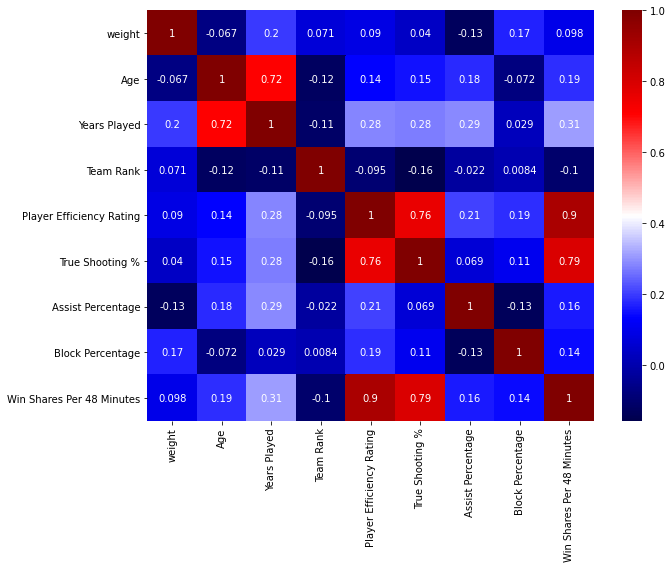

In [112]:
# Set1
# Player Efficiency Rating',
# True Shooting %', 
# 'Assist Percentage', 
# Block Percentage', 
# 'Win Shares Per 48 Minutes'

FPos_set1 = pd.DataFrame(FPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Player Efficiency Rating','True Shooting %', 'Assist Percentage', 
    'Block Percentage', 'Win Shares Per 48 Minutes',
    ])
corrMatrix = FPos_set1.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Fpos_set1"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

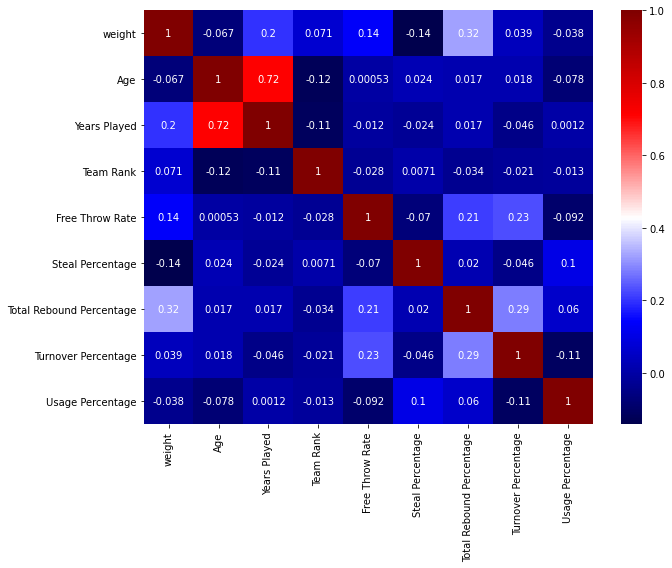

In [113]:
# Set2
# Free Throw Rate
# Total Rebound Percentage
# Steal Percentage
# Turnover Percentage
# Usage Percentage
FPos_set2 = pd.DataFrame(FPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Free Throw Rate','Steal Percentage', 'Total Rebound Percentage', 
    'Turnover Percentage', 'Usage Percentage',
    ])
corrMatrix = FPos_set2.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Fpos_set2"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

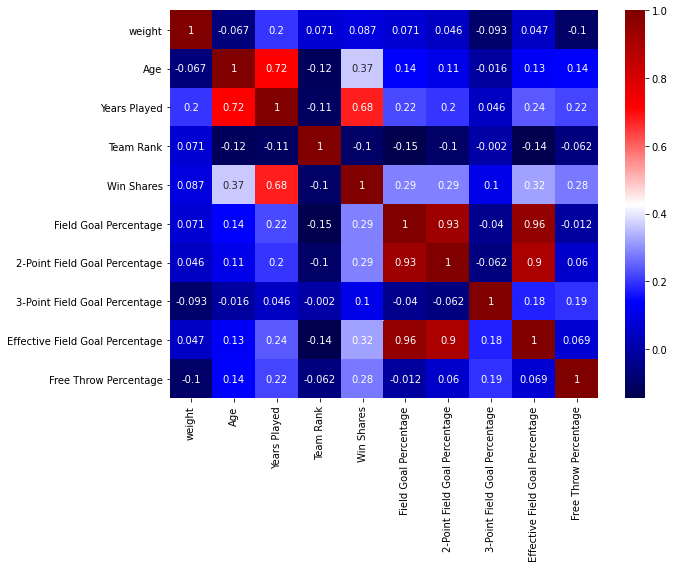

In [114]:
# Set3
# Win Shares
# Field Goal Percentage
# 2-Point Field Goal Percentage
# 3-Point Field Goal Percentage
# Effective Field Goal Percentage
# Free Throw Percentage

FPos_set3 = pd.DataFrame(FPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Win Shares','Field Goal Percentage', '2-Point Field Goal Percentage', 
    '3-Point Field Goal Percentage', 'Effective Field Goal Percentage',
    'Free Throw Percentage'
    ])
corrMatrix = FPos_set3.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Fpos_set3"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

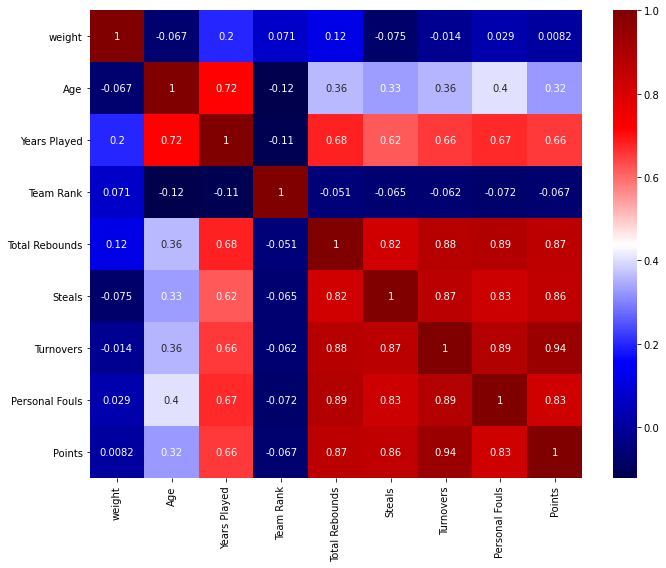

In [115]:
# Set4
# Total Rebounds
# Steals
# Turnovers
# Personal Fouls
# Points

FPos_set4 = pd.DataFrame(FPos_player_mean, columns=[
    'weight', 'Age', 'Years Played', 'Team Rank',
    'Total Rebounds','Steals', 'Turnovers', 
    'Personal Fouls', 'Points'
    ])
corrMatrix = FPos_set4.corr().fillna(0)
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "Fpos_set4"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

The correlation coefficient between weight and average Points is -0.19
The p-value is: 0.031697


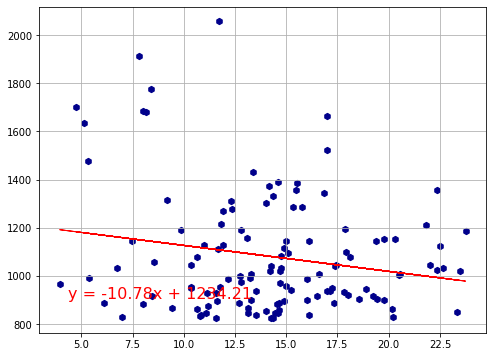

In [156]:
x=x1['Team Rank']
y=y1['PTS']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=40, color = 'darkblue', marker='h')

#clb = plt.colorbar()

plt.plot(x, regress_values, "r-", linewidth=1)
#plt.xlabel('Weight (lb)', fontsize=14)
#plt.ylabel('PTS', fontsize=14)
#plt.title("Capomulin-treated Mice", fontsize=16)
plt.annotate(line_eq, xy=((min(x)+abs(min(x)*0.1)), (min(y)+abs(min(y)*0.1))), fontsize=16, color="red")

print(f"The correlation coefficient between weight and average Points is {round(st.pearsonr(x,y)[0],2)}")
print(f"The p-value is: {round(pvalue, 6)}")

plt.grid()
plt.show()

In [53]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import linregress

# def plot_response_linrreg(x, y, x_axis, y_axis, title):
#     regress_values = []
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     for i in x:
#         regress_values.append(i * slope + intercept)
    
#     plt.figure(figsize=(7,5))
#     plt.scatter(x, y, s=40, facecolor="skyblue", color='darkblue')  
#     plt.plot(x, regress_values, "r-", linewidth=1)
    
#     plt.title(title, fontsize=16)
#     plt.xlabel(x_axis, fontsize=14)
#     plt.ylabel(y_axis, fontsize=14)

# #Place annotation for the regression line in the bottom left corner of the plot
#     plt.annotate(line_eq, xy=((min(x)+abs(min(x)*0.1)), (min(y)+abs(min(y)*0.1))), fontsize=16, color="red")
#     plt.grid()
# #Save into output folder
# #    plt.savefig(f"output/{fig_name}.png")

# #Show and print
#     print(f"The R-squared is: {round(rvalue, 2)} | The p-value is {round(pvalue, 4)}") 
#     plt.show()